In [ ]:
История такова:
    Есть необычный род микроспридий, Globosporidium, паразитирующий на инфузориях рода Paramecium.
    Необычен он тем, что паразитирует не в самом типичном для микроспоридий хозяине.
    Но он не одинок!
    Есть еще одна микроспоридий, Euplotespora, которая заражает инфузорий рода Euplotes.
    Они достаточно близко расположены на филогенетическом дереве.
    Однако в их компании есть и другие микроспоридии:
        Helmichia из личинки комара-звонца и Mrazekia из рачка-макроциклопа.
    Euplotespora являтеся паразитом инфузории из солоноватых вод, тогда как
    троица Globosporidium, Helmichia и Mrazekia паразитируют на пресноводных беспозвоночных.
    
Вопрос:
    Один ли раз случился переход к паразитированию на инфузориях в эволюции?
    Или это было два независисых перехода?..

In [8]:
# импортируем библиотеки

from Bio import Entrez, SeqIO, AlignIO, Phylo
from Bio.Phylo.Consensus import *
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import matplotlib.pyplot as plt

In [2]:
# говорим, кто мы

Entrez.email = 'yakovleva.spbu@gmail.com'

In [3]:
# получаем все фасты гена SSU rRNA микроспоридий из проб окружающей среды

handle = Entrez.esearch(db="nucleotide",
                        term="Microsporidia[Orgn] AND environmental sample AND small subunit ribosomal RNA",
                        idtype="acc", retmode='xml', retmax=1000000)
record = Entrez.read(handle)

ssu_ids = []
for element in record['IdList']:
    ssu_ids.append(element)
print('Нашлось ' + str(len(ssu_ids)) + ' микроспоридийных последовательностей')
    
query_string = ','.join(ssu_ids)

handle = Entrez.efetch(db="nucleotide", id=ssu_ids, rettype="fasta", retmode="text")
record = SeqIO.parse(handle, 'fasta')

with open("micro_env_seq.fna", "w") as out_f:
    SeqIO.write(record, out_f, "fasta")
    
print('Скачано и сохранено в файл micro_env_seq.fna')

Нашлось 221 микроспоридийных последовательностей
Скачано и сохранено в файл micro_env_seq.fna


In [5]:
# знакомимся с полученными сиквенсами, исключаем те, про которые что-то известно
# как минимум про них известно то, что они достаточно далеки от рода Globosporidium
with open("micro_env_seq.fna", "r") as in_f:
    sequences = SeqIO.parse(in_f, "fasta")
    count = 0
    with open("micro_env_seq_reduced.fna", "w") as out_f:
        for record in sequences:
            # print(record.description)
            if "Enterocytozoon" in record.description or \
            "Encephalitozoon" in record.description or \
            "Dictyocoela" in record.description or \
            "Nosem" in record.description or \
            "Unikaryon" in record.description or \
            "Vittaforma" in record.description or \
            "Parathelohania" in record.description or \
            "Metchnikovellidae" in record.description or \
            "Nucleospora" in record.description:
                pass
            else:
                # записываем только неизвестные сиквенсы и "Glugea" "Spraguea" для аутгруппы
                SeqIO.write(record, out_f, "fasta")
                count +=1
            
print('Из 221 сиквенса осталось ' + str(count))

Из 221 сиквенса осталось 84


In [ ]:
Пояснение за аутгруппу:
    Наши зверушки находятся в 4 кладе микроспоридий.
    5 клада является сестринской к 4 кладе, поэтому ее удобно использовать в качестве аутгруппы.
    Именно поэтому пару зверух для аутгруппы (Glugea и Spraguea) я оставила

In [6]:
# склеиваем фасты с паразитом, его близкими родственниками и зверухами из проб окружающей среды
! cat micro_env_seq_reduces.fna close_relatives.fa globo_ssu.fa > microsporidian_ssu.fa
! grep -c ">" microsporidian_ssu.fa

91


In [7]:
# проведем кластеризацию последовательностей (параметр identity -c 0.99)
! cd-hit-est -i microsporidian_ssu.fa -o microsporidian_ssu_centroids.fa -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit-est -i microsporidian_ssu.fa -o
         microsporidian_ssu_centroids.fa -c 0.99

Started: Wed Mar 25 22:23:08 2020
                            Output                              
----------------------------------------------------------------
total seq: 91
longest and shortest : 1284 and 116
Total letters: 46437
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 12M = 12M
Table           : 1 X 16M = 16M
Miscellaneous   : 4M
Total           : 33M

Table limit with the given memory limit:
Max number of representatives: 893237
Max number of word counting entries: 95831471

comparing sequences from          0  to         91

       91  finished         80  clusters

Approximated maximum memory consumption: 33M
writing new database
writing clustering information
program completed !

Total CPU time 0.13


In [ ]:
Поинт про кластеризацию:
    Ставить identity treshold ниже 0.99 не могу, поскольку внутри рода Globosporidium sequence similariry 98.4%

In [8]:
# супер, осталось 80 последовательностей, с которыми можно уже что-то сделать
! grep -c ">" microsporidian_ssu_centroids.fa

80


In [9]:
%%time
! clustalw -INFILE=./microsporidian_ssu_centroids.fa -OUTFILE=./microsporidian_clustalw.fa -OUTPUT=FASTA




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: MG241441.1                 371 bp
Sequence 2: MG241440.1                 396 bp
Sequence 3: MG241439.1                 407 bp
Sequence 4: MG241438.1                 353 bp
Sequence 5: MG241437.1                 372 bp
Sequence 6: MG241436.1                 374 bp
Sequence 7: MG241435.1                 391 bp
Sequence 8: MG241434.1                 412 bp
Sequence 9: MG241433.1                 370 bp
Sequence 10: MG241432.1                 412 bp
Sequence 11: MG241431.1                 387 bp
Sequence 12: MG241430.1                 368 bp
Sequence 13: MG241429.1                 379 bp
Sequence 14: MG241428.1                 362 bp
Sequence 15: MG241427.1                 119 bp
Sequence 16: MG241426.1                 420 bp
Sequence 17: MG241425.1                 404 bp
Sequence 18: MG241424.1                 136 bp
Sequence 19: MG241423.1                 350 bp
Sequence 20: MG241422.1                 37

Sequences (2:57) Aligned. Score:  48
Sequences (2:58) Aligned. Score:  62
Sequences (2:59) Aligned. Score:  44
Sequences (2:60) Aligned. Score:  70
Sequences (2:61) Aligned. Score:  59
Sequences (2:62) Aligned. Score:  64
Sequences (2:63) Aligned. Score:  28
Sequences (2:64) Aligned. Score:  64
Sequences (2:65) Aligned. Score:  45
Sequences (2:66) Aligned. Score:  47
Sequences (2:67) Aligned. Score:  47
Sequences (2:68) Aligned. Score:  54
Sequences (2:69) Aligned. Score:  44
Sequences (2:70) Aligned. Score:  47
Sequences (2:71) Aligned. Score:  46
Sequences (2:72) Aligned. Score:  48
Sequences (2:73) Aligned. Score:  41
Sequences (2:74) Aligned. Score:  64
Sequences (2:75) Aligned. Score:  41
Sequences (2:76) Aligned. Score:  63
Sequences (2:77) Aligned. Score:  44
Sequences (2:78) Aligned. Score:  65
Sequences (2:79) Aligned. Score:  64
Sequences (2:80) Aligned. Score:  65
Sequences (3:4) Aligned. Score:  69
Sequences (3:5) Aligned. Score:  83
Sequences (3:6) Aligned. Score:  72
Sequ

Sequences (5:57) Aligned. Score:  77
Sequences (5:58) Aligned. Score:  54
Sequences (5:59) Aligned. Score:  75
Sequences (5:60) Aligned. Score:  72
Sequences (5:61) Aligned. Score:  63
Sequences (5:62) Aligned. Score:  75
Sequences (5:63) Aligned. Score:  74
Sequences (5:64) Aligned. Score:  75
Sequences (5:65) Aligned. Score:  63
Sequences (5:66) Aligned. Score:  48
Sequences (5:67) Aligned. Score:  48
Sequences (5:68) Aligned. Score:  48
Sequences (5:69) Aligned. Score:  62
Sequences (5:70) Aligned. Score:  63
Sequences (5:71) Aligned. Score:  61
Sequences (5:72) Aligned. Score:  60
Sequences (5:73) Aligned. Score:  60
Sequences (5:74) Aligned. Score:  69
Sequences (5:75) Aligned. Score:  66
Sequences (5:76) Aligned. Score:  70
Sequences (5:77) Aligned. Score:  74
Sequences (5:78) Aligned. Score:  74
Sequences (5:79) Aligned. Score:  71
Sequences (5:80) Aligned. Score:  70
Sequences (6:7) Aligned. Score:  56
Sequences (6:8) Aligned. Score:  60
Sequences (6:9) Aligned. Score:  75
Sequ

Sequences (8:66) Aligned. Score:  33
Sequences (8:67) Aligned. Score:  33
Sequences (8:68) Aligned. Score:  32
Sequences (8:69) Aligned. Score:  55
Sequences (8:70) Aligned. Score:  55
Sequences (8:71) Aligned. Score:  57
Sequences (8:72) Aligned. Score:  55
Sequences (8:73) Aligned. Score:  57
Sequences (8:74) Aligned. Score:  50
Sequences (8:75) Aligned. Score:  61
Sequences (8:76) Aligned. Score:  62
Sequences (8:77) Aligned. Score:  62
Sequences (8:78) Aligned. Score:  64
Sequences (8:79) Aligned. Score:  62
Sequences (8:80) Aligned. Score:  62
Sequences (9:10) Aligned. Score:  72
Sequences (9:11) Aligned. Score:  84
Sequences (9:12) Aligned. Score:  91
Sequences (9:13) Aligned. Score:  70
Sequences (9:14) Aligned. Score:  74
Sequences (9:15) Aligned. Score:  71
Sequences (9:16) Aligned. Score:  76
Sequences (9:17) Aligned. Score:  69
Sequences (9:18) Aligned. Score:  63
Sequences (9:19) Aligned. Score:  92
Sequences (9:20) Aligned. Score:  76
Sequences (9:21) Aligned. Score:  44
S

Sequences (11:75) Aligned. Score:  74
Sequences (11:76) Aligned. Score:  82
Sequences (11:77) Aligned. Score:  82
Sequences (11:78) Aligned. Score:  81
Sequences (11:79) Aligned. Score:  81
Sequences (11:80) Aligned. Score:  82
Sequences (12:13) Aligned. Score:  69
Sequences (12:14) Aligned. Score:  73
Sequences (12:15) Aligned. Score:  74
Sequences (12:16) Aligned. Score:  72
Sequences (12:17) Aligned. Score:  68
Sequences (12:18) Aligned. Score:  66
Sequences (12:19) Aligned. Score:  86
Sequences (12:20) Aligned. Score:  77
Sequences (12:21) Aligned. Score:  43
Sequences (12:22) Aligned. Score:  72
Sequences (12:23) Aligned. Score:  77
Sequences (12:24) Aligned. Score:  75
Sequences (12:25) Aligned. Score:  73
Sequences (12:26) Aligned. Score:  73
Sequences (12:27) Aligned. Score:  59
Sequences (12:28) Aligned. Score:  70
Sequences (12:29) Aligned. Score:  29
Sequences (12:30) Aligned. Score:  73
Sequences (12:31) Aligned. Score:  73
Sequences (12:32) Aligned. Score:  80
Sequences (1

Sequences (15:74) Aligned. Score:  64
Sequences (15:75) Aligned. Score:  22
Sequences (15:76) Aligned. Score:  65
Sequences (15:77) Aligned. Score:  67
Sequences (15:78) Aligned. Score:  70
Sequences (15:79) Aligned. Score:  63
Sequences (15:80) Aligned. Score:  63
Sequences (16:17) Aligned. Score:  67
Sequences (16:18) Aligned. Score:  40
Sequences (16:19) Aligned. Score:  72
Sequences (16:20) Aligned. Score:  45
Sequences (16:21) Aligned. Score:  75
Sequences (16:22) Aligned. Score:  42
Sequences (16:23) Aligned. Score:  71
Sequences (16:24) Aligned. Score:  44
Sequences (16:25) Aligned. Score:  75
Sequences (16:26) Aligned. Score:  82
Sequences (16:27) Aligned. Score:  38
Sequences (16:28) Aligned. Score:  72
Sequences (16:29) Aligned. Score:  67
Sequences (16:30) Aligned. Score:  69
Sequences (16:31) Aligned. Score:  43
Sequences (16:32) Aligned. Score:  69
Sequences (16:33) Aligned. Score:  33
Sequences (16:34) Aligned. Score:  39
Sequences (16:35) Aligned. Score:  60
Sequences (1

Sequences (19:47) Aligned. Score:  90
Sequences (19:48) Aligned. Score:  66
Sequences (19:49) Aligned. Score:  68
Sequences (19:50) Aligned. Score:  76
Sequences (19:51) Aligned. Score:  66
Sequences (19:52) Aligned. Score:  77
Sequences (19:53) Aligned. Score:  53
Sequences (19:54) Aligned. Score:  73
Sequences (19:55) Aligned. Score:  67
Sequences (19:56) Aligned. Score:  72
Sequences (19:57) Aligned. Score:  87
Sequences (19:58) Aligned. Score:  40
Sequences (19:59) Aligned. Score:  86
Sequences (19:60) Aligned. Score:  65
Sequences (19:61) Aligned. Score:  66
Sequences (19:62) Aligned. Score:  90
Sequences (19:63) Aligned. Score:  88
Sequences (19:64) Aligned. Score:  92
Sequences (19:65) Aligned. Score:  71
Sequences (19:66) Aligned. Score:  50
Sequences (19:67) Aligned. Score:  54
Sequences (19:68) Aligned. Score:  46
Sequences (19:69) Aligned. Score:  77
Sequences (19:70) Aligned. Score:  78
Sequences (19:71) Aligned. Score:  78
Sequences (19:72) Aligned. Score:  77
Sequences (1

Sequences (23:37) Aligned. Score:  39
Sequences (23:38) Aligned. Score:  74
Sequences (23:39) Aligned. Score:  80
Sequences (23:40) Aligned. Score:  80
Sequences (23:41) Aligned. Score:  82
Sequences (23:42) Aligned. Score:  76
Sequences (23:43) Aligned. Score:  79
Sequences (23:44) Aligned. Score:  64
Sequences (23:45) Aligned. Score:  72
Sequences (23:46) Aligned. Score:  75
Sequences (23:47) Aligned. Score:  75
Sequences (23:48) Aligned. Score:  81
Sequences (23:49) Aligned. Score:  56
Sequences (23:50) Aligned. Score:  80
Sequences (23:51) Aligned. Score:  86
Sequences (23:52) Aligned. Score:  74
Sequences (23:53) Aligned. Score:  62
Sequences (23:54) Aligned. Score:  61
Sequences (23:55) Aligned. Score:  83
Sequences (23:56) Aligned. Score:  74
Sequences (23:57) Aligned. Score:  77
Sequences (23:58) Aligned. Score:  38
Sequences (23:59) Aligned. Score:  77
Sequences (23:60) Aligned. Score:  66
Sequences (23:61) Aligned. Score:  61
Sequences (23:62) Aligned. Score:  75
Sequences (2

Sequences (28:29) Aligned. Score:  65
Sequences (28:30) Aligned. Score:  75
Sequences (28:31) Aligned. Score:  72
Sequences (28:32) Aligned. Score:  70
Sequences (28:33) Aligned. Score:  37
Sequences (28:34) Aligned. Score:  75
Sequences (28:35) Aligned. Score:  62
Sequences (28:36) Aligned. Score:  69
Sequences (28:37) Aligned. Score:  44
Sequences (28:38) Aligned. Score:  67
Sequences (28:39) Aligned. Score:  72
Sequences (28:40) Aligned. Score:  73
Sequences (28:41) Aligned. Score:  72
Sequences (28:42) Aligned. Score:  70
Sequences (28:43) Aligned. Score:  72
Sequences (28:44) Aligned. Score:  75
Sequences (28:45) Aligned. Score:  75
Sequences (28:46) Aligned. Score:  90
Sequences (28:47) Aligned. Score:  70
Sequences (28:48) Aligned. Score:  74
Sequences (28:49) Aligned. Score:  68
Sequences (28:50) Aligned. Score:  61
Sequences (28:51) Aligned. Score:  74
Sequences (28:52) Aligned. Score:  50
Sequences (28:53) Aligned. Score:  65
Sequences (28:54) Aligned. Score:  63
Sequences (2

Sequences (32:79) Aligned. Score:  66
Sequences (32:80) Aligned. Score:  66
Sequences (33:34) Aligned. Score:  30
Sequences (33:35) Aligned. Score:  59
Sequences (33:36) Aligned. Score:  34
Sequences (33:37) Aligned. Score:  34
Sequences (33:38) Aligned. Score:  35
Sequences (33:39) Aligned. Score:  37
Sequences (33:40) Aligned. Score:  50
Sequences (33:41) Aligned. Score:  42
Sequences (33:42) Aligned. Score:  34
Sequences (33:43) Aligned. Score:  42
Sequences (33:44) Aligned. Score:  41
Sequences (33:45) Aligned. Score:  61
Sequences (33:46) Aligned. Score:  60
Sequences (33:47) Aligned. Score:  35
Sequences (33:48) Aligned. Score:  33
Sequences (33:49) Aligned. Score:  16
Sequences (33:50) Aligned. Score:  38
Sequences (33:51) Aligned. Score:  55
Sequences (33:52) Aligned. Score:  18
Sequences (33:53) Aligned. Score:  59
Sequences (33:54) Aligned. Score:  17
Sequences (33:55) Aligned. Score:  37
Sequences (33:56) Aligned. Score:  35
Sequences (33:57) Aligned. Score:  36
Sequences (3

Sequences (37:72) Aligned. Score:  41
Sequences (37:73) Aligned. Score:  36
Sequences (37:74) Aligned. Score:  41
Sequences (37:75) Aligned. Score:  40
Sequences (37:76) Aligned. Score:  61
Sequences (37:77) Aligned. Score:  39
Sequences (37:78) Aligned. Score:  56
Sequences (37:79) Aligned. Score:  62
Sequences (37:80) Aligned. Score:  62
Sequences (38:39) Aligned. Score:  82
Sequences (38:40) Aligned. Score:  88
Sequences (38:41) Aligned. Score:  79
Sequences (38:42) Aligned. Score:  73
Sequences (38:43) Aligned. Score:  83
Sequences (38:44) Aligned. Score:  35
Sequences (38:45) Aligned. Score:  64
Sequences (38:46) Aligned. Score:  70
Sequences (38:47) Aligned. Score:  73
Sequences (38:48) Aligned. Score:  80
Sequences (38:49) Aligned. Score:  65
Sequences (38:50) Aligned. Score:  74
Sequences (38:51) Aligned. Score:  84
Sequences (38:52) Aligned. Score:  67
Sequences (38:53) Aligned. Score:  61
Sequences (38:54) Aligned. Score:  63
Sequences (38:55) Aligned. Score:  76
Sequences (3

Sequences (43:57) Aligned. Score:  66
Sequences (43:58) Aligned. Score:  54
Sequences (43:59) Aligned. Score:  66
Sequences (43:60) Aligned. Score:  45
Sequences (43:61) Aligned. Score:  54
Sequences (43:62) Aligned. Score:  70
Sequences (43:63) Aligned. Score:  66
Sequences (43:64) Aligned. Score:  66
Sequences (43:65) Aligned. Score:  42
Sequences (43:66) Aligned. Score:  28
Sequences (43:67) Aligned. Score:  28
Sequences (43:68) Aligned. Score:  28
Sequences (43:69) Aligned. Score:  37
Sequences (43:70) Aligned. Score:  38
Sequences (43:71) Aligned. Score:  38
Sequences (43:72) Aligned. Score:  33
Sequences (43:73) Aligned. Score:  37
Sequences (43:74) Aligned. Score:  64
Sequences (43:75) Aligned. Score:  38
Sequences (43:76) Aligned. Score:  65
Sequences (43:77) Aligned. Score:  65
Sequences (43:78) Aligned. Score:  66
Sequences (43:79) Aligned. Score:  46
Sequences (43:80) Aligned. Score:  62
Sequences (44:45) Aligned. Score:  84
Sequences (44:46) Aligned. Score:  75
Sequences (4

Sequences (50:56) Aligned. Score:  47
Sequences (50:57) Aligned. Score:  77
Sequences (50:58) Aligned. Score:  47
Sequences (50:59) Aligned. Score:  77
Sequences (50:60) Aligned. Score:  65
Sequences (50:61) Aligned. Score:  63
Sequences (50:62) Aligned. Score:  75
Sequences (50:63) Aligned. Score:  73
Sequences (50:64) Aligned. Score:  75
Sequences (50:65) Aligned. Score:  71
Sequences (50:66) Aligned. Score:  48
Sequences (50:67) Aligned. Score:  48
Sequences (50:68) Aligned. Score:  48
Sequences (50:69) Aligned. Score:  67
Sequences (50:70) Aligned. Score:  69
Sequences (50:71) Aligned. Score:  70
Sequences (50:72) Aligned. Score:  69
Sequences (50:73) Aligned. Score:  69
Sequences (50:74) Aligned. Score:  78
Sequences (50:75) Aligned. Score:  76
Sequences (50:76) Aligned. Score:  79
Sequences (50:77) Aligned. Score:  75
Sequences (50:78) Aligned. Score:  77
Sequences (50:79) Aligned. Score:  79
Sequences (50:80) Aligned. Score:  79
Sequences (51:52) Aligned. Score:  72
Sequences (5

Sequences (58:68) Aligned. Score:  75
Sequences (58:69) Aligned. Score:  65
Sequences (58:70) Aligned. Score:  66
Sequences (58:71) Aligned. Score:  66
Sequences (58:72) Aligned. Score:  65
Sequences (58:73) Aligned. Score:  61
Sequences (58:74) Aligned. Score:  61
Sequences (58:75) Aligned. Score:  57
Sequences (58:76) Aligned. Score:  56
Sequences (58:77) Aligned. Score:  58
Sequences (58:78) Aligned. Score:  58
Sequences (58:79) Aligned. Score:  58
Sequences (58:80) Aligned. Score:  59
Sequences (59:60) Aligned. Score:  74
Sequences (59:61) Aligned. Score:  61
Sequences (59:62) Aligned. Score:  89
Sequences (59:63) Aligned. Score:  88
Sequences (59:64) Aligned. Score:  88
Sequences (59:65) Aligned. Score:  71
Sequences (59:66) Aligned. Score:  59
Sequences (59:67) Aligned. Score:  59
Sequences (59:68) Aligned. Score:  60
Sequences (59:69) Aligned. Score:  85
Sequences (59:70) Aligned. Score:  88
Sequences (59:71) Aligned. Score:  86
Sequences (59:72) Aligned. Score:  86
Sequences (5

Sequences (73:75) Aligned. Score:  83
Sequences (73:76) Aligned. Score:  77
Sequences (73:77) Aligned. Score:  80
Sequences (73:78) Aligned. Score:  80
Sequences (73:79) Aligned. Score:  80
Sequences (73:80) Aligned. Score:  79
Sequences (74:75) Aligned. Score:  85
Sequences (74:76) Aligned. Score:  87
Sequences (74:77) Aligned. Score:  87
Sequences (74:78) Aligned. Score:  88
Sequences (74:79) Aligned. Score:  91
Sequences (74:80) Aligned. Score:  90
Sequences (75:76) Aligned. Score:  82
Sequences (75:77) Aligned. Score:  80
Sequences (75:78) Aligned. Score:  80
Sequences (75:79) Aligned. Score:  82
Sequences (75:80) Aligned. Score:  84
Sequences (76:77) Aligned. Score:  88
Sequences (76:78) Aligned. Score:  91
Sequences (76:79) Aligned. Score:  93
Sequences (76:80) Aligned. Score:  93
Sequences (77:78) Aligned. Score:  90
Sequences (77:79) Aligned. Score:  91
Sequences (77:80) Aligned. Score:  90
Sequences (78:79) Aligned. Score:  91
Sequences (78:80) Aligned. Score:  92
Sequences (7

In [25]:
%%time
! muscle -in microsporidian_ssu_centroids.fa -out ./microsporidian_muscle.fa


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

microsporidian_ssu_centroids 80 seqs, lengths min 118, max 1284, avg 482
00:00:00    16 MB(-3%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    16 MB(-3%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00    52 MB(-9%)  Iter   1  100.00%  Align node       
00:00:01    53 MB(-9%)  Iter   1  100.00%  Root alignment
00:00:01    53 MB(-9%)  Iter   2  100.00%  Refine tree   
00:00:01    53 MB(-9%)  Iter   2  100.00%  Root alignment
00:00:01    53 MB(-9%)  Iter   2  100.00%  Root alignment
00:00:07    53 MB(-9%)  Iter   3  100.00%  Refine biparts
00:00:12    53 MB(-9%)  Iter   4  100.00%  Refine biparts
00:00:16    53 MB(-9%)  Iter   5  100.00%  Refine biparts
00:00:16    53 MB(-9%)  Iter   5  100.00%  Refine biparts
CPU times: user 425 ms, sys: 103 ms, total: 528 ms
Wall time: 16.3 s


In [32]:
%%time
! mafft --auto --reorder ./microsporidian_ssu_centroids.fa > ./microsporidian_mafft.f

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
All-to-all alignment.
tbfast-pair (nuc) Version 7.455
alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   70 / 80
done.

Progressive alignment ... 
STEP    76 /79 
Reallocating..done. *alloclen = 3805
STEP    79 /79 
done.
tbfast (nuc) Version 7.455
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
generating a scoring matrix for nucleotide (dist=200) ... done

   70 / 80
Segmen

In [ ]:
Обращаем внимание на выбранную стратегию выравнивания: L-INS-i (медленно, но точно)

In [5]:
# подгружаем выравнивания
aln_clustalw = AlignIO.read("./microsporidian_clustalw.fa", "fasta")
aln_muscle = AlignIO.read("./microsporidian_muscle.fa", "fasta")
aln_mafft = AlignIO.read("./microsporidian_mafft.fa", "fasta")

In [36]:
# подбираем модель эволюции (очень  долго, на всех выравниваниях не гоняла)
! java -jar /home/yulia/src/jmodeltest-2.1.10/jModelTest.jar -d ./microsporidian_clustalw.fa -i -f -g 4 -BIC -AIC -v -a -w
! java -jar /home/yulia/src/jmodeltest-2.1.10/jModelTest.jar -d ./microsporidian_muscle.fa -i -f -g 4 -BIC -AIC -v -a -w
! java -jar /home/yulia/src/jmodeltest-2.1.10/jModelTest.jar -d ./microsporidian_mafft.fa -i -f -g 4 -BIC -AIC -v -a -w

[MPI] Testing MPI environment... (yulia-Aspire-V5-561G)
[MPI] Proceed without MPI
-------------------------- jModeltest 2.1.10 v20160303 --------------------------
(c) 2011-onwards D. Darriba, G.L. Taboada, R. Doallo and D. Posada,
(1) Department of Biochemistry, Genetics and Immunology
    University of Vigo, 36310 Vigo, Spain.
(2) Department of Electronics and Systems
    University of A Coruna, 15071 A Coruna, Spain.
e-mail: ddarriba@udc.es, dposada@uvigo.es
--------------------------------------------------------------------------------
 
Tue Mar 24 20:05:03 MSK 2020
Linux 5.3.0-42-generic, arch: amd64, bits: 64, numcores: 4
 
--------------------------------------------------------------------------------
Citation: Darriba D, Taboada GL, Doallo R and Posada D. 2012.
          "jModelTest 2: more models, new heuristics and parallel computing".
          Nature Methods 9(8), 772.
--------------------------------------------------------------------------------
 
jModelTest 2.1.10 v20

 
 
 
---------------------------------------------------------------
*                                                             *
*                    MODEL AVERAGED PHYLOGENY                 *
*                                                             *
---------------------------------------------------------------
 
Selection criterion: . . . . AIC
Confidence interval: . . . . 1.00
Consensus type:. . . . . . . 50% majority rule
 
 
Using 24 models in the 1.00 confidence interval = GTR+I+G GTR+G HKY+I+G HKY+G SYM+I+G SYM+G K80+I+G K80+G F81+G F81+I+G JC+G JC+I+G GTR+I HKY+I SYM+I K80+I F81+I JC+I GTR HKY SYM K80 F81 JC  
 
Species in order:
 
    1. FJ820201.1
    2. FJ820203.1
    3. FJ820202.1
    4. MG241404.1
    5. JF927624.1
    6. MG241426.1
    7. MG241415.1
    8. KP262018.1
    9. MG241440.1
    10. MG241385.1
    11. MG241421.1
    12. MG241388.1
    13. MG241396.1
    14. MG241425.1
    15. MG241397.1
    16. MG241412.1
    17. MG241414.1
    18. MG241406.1
    19.

(FJ820201.1:0.0109192700,FJ820203.1:0.0054545700,(FJ820202.1:0.0029675700,(MG241404.1:0.1194112200,((((MG241415.1:0.1384049500,KP262018.1:0.0851916900):1.0000:0.1016432500,(MG241440.1:0.7831766100,MG241385.1:0.1507413600):0.9403:0.0433556700):1.0000:0.0502967400,(JF927624.1:0.0267286500,MG241426.1:0.0004888900):1.0000:0.0710395600):1.0000:0.1105283800,(MG241421.1:0.0362783200,(((MG241417.1:0.0765034000,(MG241395.1:0.0646714200,(MG241413.1:0.0153806700,(MG241429.1:0.1404428200,MG241434.1:0.0994929000):1.0000:0.0484843400):1.0000:0.1114345100):1.0000:0.0695031700):1.0000:0.1450151000,((MG241419.1:0.2388245900,(((MG241409.1:0.0300193400,(MG241410.1:0.0291515900,(MG241418.1:0.0000007300,(MG241427.1:0.0282496600,MG241424.1:0.1036479100):1.0000:0.1096036800):1.0000:0.0815784400):1.0000:0.1667199200):1.0000:0.0820539100,((MG241390.1:0.0585924800,(MG241407.1:0.1838444100,(MG241422.1:0.0543362800,MG241393.1:0.1045755000):1.0000:0.0479508300):0.9403:0.0359459900):1.0000:0.0172108300,(MG241420.1:

 
 
 
---------------------------------------------------------------
*                                                             *
*                    MODEL AVERAGED PHYLOGENY                 *
*                                                             *
---------------------------------------------------------------
 
Selection criterion: . . . . BIC
Confidence interval: . . . . 1.00
Consensus type:. . . . . . . 50% majority rule
 
 
Using 24 models in the 1.00 confidence interval = GTR+I+G GTR+G HKY+I+G HKY+G SYM+G SYM+I+G K80+I+G K80+G F81+G F81+I+G JC+G JC+I+G GTR+I HKY+I SYM+I K80+I F81+I JC+I GTR HKY SYM K80 F81 JC  
 
Species in order:
 
    1. FJ820201.1
    2. FJ820203.1
    3. FJ820202.1
    4. MG241404.1
    5. JF927624.1
    6. MG241426.1
    7. MG241415.1
    8. KP262018.1
    9. MG241440.1
    10. MG241385.1
    11. MG241421.1
    12. MG241388.1
    13. MG241396.1
    14. MG241425.1
    15. MG241397.1
    16. MG241412.1
    17. MG241414.1
    18. MG241406.1
    19.

(FJ820201.1:0.0109192700,FJ820203.1:0.0054545700,(FJ820202.1:0.0029675700,(MG241404.1:0.1194112200,((((MG241415.1:0.1384049500,KP262018.1:0.0851916900):1.0000:0.1016432500,(MG241440.1:0.7831766100,MG241385.1:0.1507413600):0.5366:0.0433556700):1.0000:0.0502967400,(JF927624.1:0.0267286500,MG241426.1:0.0004888900):1.0000:0.0710395600):1.0000:0.1105283800,(MG241421.1:0.0362783200,(((MG241417.1:0.0765034000,(MG241395.1:0.0646714200,(MG241413.1:0.0153806700,(MG241429.1:0.1404428200,MG241434.1:0.0994929000):1.0000:0.0484843400):1.0000:0.1114345100):1.0000:0.0695031700):1.0000:0.1450151000,((MG241419.1:0.2388245900,(((MG241409.1:0.0300193400,(MG241410.1:0.0291515900,(MG241418.1:0.0000007300,(MG241427.1:0.0282496600,MG241424.1:0.1036479100):0.9993:0.1096036800):0.9993:0.0815784400):0.9993:0.1667199200):0.9993:0.0820539100,((MG241390.1:0.0585924800,(MG241407.1:0.1838444100,(MG241422.1:0.0543362800,MG241393.1:0.1045755000):1.0000:0.0479508300):0.5359:0.0359459900):0.9993:0.0172108300,(MG241420.1:

BIC 	GTR+I+G		0.29	0.18	0.30	0.23	0.00	0.00	  0.728   2.232   1.249   0.992   3.037   1.000    0.05	   0.92
[MPI] Testing MPI environment... (yulia-Aspire-V5-561G)
[MPI] Proceed without MPI
-------------------------- jModeltest 2.1.10 v20160303 --------------------------
(c) 2011-onwards D. Darriba, G.L. Taboada, R. Doallo and D. Posada,
(1) Department of Biochemistry, Genetics and Immunology
    University of Vigo, 36310 Vigo, Spain.
(2) Department of Electronics and Systems
    University of A Coruna, 15071 A Coruna, Spain.
e-mail: ddarriba@udc.es, dposada@uvigo.es
--------------------------------------------------------------------------------
 
Tue Mar 24 21:23:06 MSK 2020
Linux 5.3.0-42-generic, arch: amd64, bits: 64, numcores: 4
 
--------------------------------------------------------------------------------
Citation: Darriba D, Taboada GL, Doallo R and Posada D. 2012.
          "jModelTest 2: more models, new heuristics and parallel computing".
          Nature Methods 9(8), 7




---------------------------------------------------------------
*                                                             *
*             AKAIKE INFORMATION CRITERION (AIC)              *
*                                                             *
---------------------------------------------------------------
 
 Model selected: 
   Model = GTR+G
   partition = 012345
   -lnL = 16678.1597
   K = 167
   freqA = 0.2822 
   freqC = 0.1784 
   freqG = 0.3087 
   freqT = 0.2307 
   R(a) [AC] =  0.9020
   R(b) [AG] =  2.4427
   R(c) [AT] =  1.3206
   R(d) [CG] =  0.9569
   R(e) [CT] =  4.0011
   R(f) [GT] =  1.0000
   gamma shape = 0.4600 

--
PAUP* Commands Block:
 If you want to load the selected model and associated estimates in PAUP*,
 attach the next block of commands after the data in your PAUP file:

[!
Likelihood settings from best-fit model (GTR+G) selected by AIC
with jModeltest 2.1.10 v20160303 on Tue Mar 24 22:55:18 MSK 2020]

BEGIN PAUP;
Lset base=(0.2822 0.1784 0.308

 
Species in order:
 
    1. FJ820201.1
    2. FJ820202.1
    3. FJ820203.1
    4. MG241404.1
    5. MG241421.1
    6. MG241426.1
    7. JF927624.1
    8. MG241385.1
    9. MG241415.1
    10. KP262018.1
    11. MG241440.1
    12. MG241388.1
    13. MG241412.1
    14. MG241414.1
    15. MG241439.1
    16. MG241411.1
    17. MG241406.1
    18. MG241396.1
    19. MG241425.1
    20. MG241397.1
    21. MG241429.1
    22. MG241434.1
    23. MG241413.1
    24. MG241395.1
    25. MG241417.1
    26. MG241389.1
    27. MG241432.1
    28. MG241387.1
    29. EU828593.1
    30. MG241392.1
    31. FJ820204.1
    32. EU828590.1
    33. MG241405.1
    34. FJ820197.1
    35. FJ820194.1
    36. MG241394.1
    37. FJ820199.1
    38. MG241430.1
    39. EU828592.1
    40. KP006651.1
    41. MG241384.1
    42. MG241433.1
    43. AY233131.2
    44. FJ820200.1
    45. FJ914315.1
    46. Globosporidium_paramecii
    47. Globosporidium_sp_nov
    48. DQ675604.1
    49. GU130406.1
    50. MG241428.1
    51. FJ82

 
 
 
---------------------------------------------------------------
*                                                             *
*                    MODEL AVERAGED PHYLOGENY                 *
*                                                             *
---------------------------------------------------------------
 
Selection criterion: . . . . BIC
Confidence interval: . . . . 1.00
Consensus type:. . . . . . . 50% majority rule
 
 
Using 24 models in the 1.00 confidence interval = HKY+G GTR+G HKY+I+G GTR+I+G SYM+I+G SYM+G K80+G K80+I+G F81+G F81+I+G JC+G JC+I+G GTR+I HKY+I SYM+I K80+I F81+I JC+I GTR SYM HKY K80 F81 JC  
 
Species in order:
 
    1. FJ820201.1
    2. FJ820202.1
    3. FJ820203.1
    4. MG241404.1
    5. MG241421.1
    6. MG241426.1
    7. JF927624.1
    8. MG241385.1
    9. MG241415.1
    10. KP262018.1
    11. MG241440.1
    12. MG241389.1
    13. MG241432.1
    14. MG241387.1
    15. EU828593.1
    16. MG241392.1
    17. MG241408.1
    18. MG241419.1
    19.

::Optimized Topologies Summary::

There are 24 different topologies.

Topology Id: 1
	Rank	Weight		 RF	AvgEucl		VarEucl
AIC	  1	 99.97%		  0	0.00e+00	0.00e+00
BIC	  9	 21.47%		 36	2.37e+00	0.00e+00
Models supporting:   1
                     GTR+G 

Topology Id: 2
	Rank	Weight		 RF	AvgEucl		VarEucl
AIC	  2	  0.00%		 20	2.35e+00	0.00e+00
BIC	  8	  0.00%		 36	2.36e+00	0.00e+00
Models supporting:   1
                     SYM+G 

Topology Id: 3
	Rank	Weight		 RF	AvgEucl		VarEucl
AIC	  3	  0.00%		 30	2.31e+00	0.00e+00
BIC	  4	  0.00%		 34	2.21e+00	0.00e+00
Models supporting:   1
                     F81+G 

Topology Id: 4
	Rank	Weight		 RF	AvgEucl		VarEucl
AIC	  4	  0.01%		 36	2.37e+00	0.00e+00
BIC	  1	 78.52%		  0	0.00e+00	0.00e+00
Models supporting:   1
                     HKY+G 

Topology Id: 5
	Rank	Weight		 RF	AvgEucl		VarEucl
AIC	  5	  0.00%		 40	2.14e+00	0.00e+00
BIC	  3	  0.00%		 30	2.23e+00	0.00e+00
Models supporting:   1
                     JC+G 

Topology Id: 6
	Rank	Weight		 R

In [ ]:
# выбираем модель GTR+G+I+G, однако для RAxML все-таки еще GTRCAT проверим

In [ ]:
# запуск PartitionFinder

In [7]:
# переводим выравниваня в Phylip здесь, потому что даже конвертация биопитоном в формате phylip-sequential не пошла:
# не везде ставятся необходимый пробел между именем и сиквенсом

http://phylogeny.lirmm.fr/phylo_cgi/data_converter.cgi

In [9]:
! /home/yulia/anaconda2/bin/python2.7 /home/yulia/src/partitionfinder-2.1.1/PartitionFinder.py /home/yulia/jupiter_labnotes

INFO     | 2020-03-25 18:47:59,791 | NumExpr defaulting to 4 threads.
INFO     | 2020-03-25 18:48:00,311 | ------------- PartitionFinder 2.1.1 -----------------
INFO     | 2020-03-25 18:48:00,311 | You have Python version 2.7
INFO     | 2020-03-25 18:48:00,312 | Command-line arguments used: /home/yulia/src/partitionfinder-2.1.1/PartitionFinder.py /home/yulia/jupiter_labnotes
INFO     | 2020-03-25 18:48:00,312 | ------------- Configuring Parameters -------------
INFO     | 2020-03-25 18:48:00,312 | Setting datatype to 'DNA'
INFO     | 2020-03-25 18:48:00,312 | Setting phylogeny program to 'phyml'
INFO     | 2020-03-25 18:48:00,312 | Program path is here /home/yulia/src/partitionfinder-2.1.1/programs
INFO     | 2020-03-25 18:48:00,312 | Setting working folder to: '/home/yulia/jupiter_labnotes'
INFO     | 2020-03-25 18:48:00,313 | Loading configuration at './partition_finder.cfg'
INFO     | 2020-03-25 18:48:00,319 | Setting 'alignment' to 'microsporidian_clustalw.phy'
INFO     | 2020-03-2

In [11]:
microsporidian_ssu_centroids.fa! cat ./analysis/best_scheme.txt

Settings used

alignment         : ./microsporidian_clustalw.phy
branchlengths     : linked
models            : JC, K80, TRNEF, K81, TVMEF, TIMEF, SYM, F81, HKY, TRN, K81UF, TVM, TIM, GTR, JC+G, K80+G, TRNEF+G, K81+G, TVMEF+G, TIMEF+G, SYM+G, F81+G, HKY+G, TRN+G, K81UF+G, TVM+G, TIM+G, GTR+G, JC+I, K80+I, TRNEF+I, K81+I, TVMEF+I, TIMEF+I, SYM+I, F81+I, HKY+I, TRN+I, K81UF+I, TVM+I, TIM+I, GTR+I, JC+I+G, K80+I+G, TRNEF+I+G, K81+I+G, TVMEF+I+G, TIMEF+I+G, SYM+I+G, F81+I+G, HKY+I+G, TRN+I+G, K81UF+I+G, TVM+I+G, TIM+I+G, GTR+I+G
model_selection   : bic
search            : all


Best partitioning scheme

Scheme Name       : 1
Scheme lnL        : -18202.287109375
Scheme BIC        : 37615.10219
Number of params  : 166
Number of sites   : 1469
Number of subsets : 1

Subset | Best Model | # sites    | subset id                        | Partition names                                                                                     
1      | GTR+G      | 1469       | 71251672012eb16aed4220d8

In [ ]:
Итого:
    jModelTest предлагает GTR+G+I+G
    PartitionFinder предлагает GTR+G
    я предлагаю GTRCAT по статьям
    
Строить по два дерева по трем выравниваниям с тремя моделями
Gblocks юзать не стоит, поскольку даже с самыми нестрогими параметрами получается,что два вида рода Globo не расходятся

In [2]:
# результаты GBLOCKS 0.91b:
! ls *.fst

clustalw_regions.fst  mafft_regions.fst  muscle_regions.fst


In [6]:
! cat run_raxml.sh

#!/bin/bash

raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMA -n mafft_GTRGAMMA -T 8 -s microsporidian_mafft.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMA -n muscle_GTRGAMMA -T 16 -s microsporidian_muscle.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMA -n clustalw_GTRGAMMA -T 16 -s microsporidian_clustalw.fa -p 12345

raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMAI -n mafft_GTRGAMMAI -T 16 -s microsporidian_mafft.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMAI -n muscle_GTRGAMMAI -T 16 -s microsporidian_muscle.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRGAMMAI -n clustalw_GTRGAMMAI -T 16 -s microsporidian_clustalw.fa -p 12345

raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRCAT -n mafft_GTRCAT -T 16 -s microsporidian_mafft.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRCAT -n muscle_GTRCAT -T 16 -s microsporidian_muscle.fa -p 12345
raxmlHPC-PTHREADS -f a -x 12345 -# autoMRE -m GTRC

In [158]:
# делаем словарь соответствия айдишников таксонам, чтобы было удобнее переименовывать листья деревьев

id_list = []
name_list= []

with open("microsporidian_ssu_centroids.fa", "r") as in_f:
    sequences = SeqIO.parse(in_f, "fasta")
    for record in sequences:
#         id_list.append(record.id)
        cutted_string = record.description.replace(' partial sequence', '').replace(' small subunit ribosomal RNA gene,', '')\
             .replace(' complete sequence', '')
        if cutted_string != 'Globosporidium_paramecii' and cutted_string != 'Globosporidium_sp_nov':
            id_list.append(cutted_string.split(' ')[0])
            name_list.append('_'.join(cutted_string.split(' ')[1:]))
            
taxon_dict = dict(zip(id_list, name_list))

for el in taxon_dict:
    print(el, taxon_dict[el])

MG241441.1 Uncultured_Microsporidia_clone_OTU9
MG241440.1 Uncultured_Microsporidia_clone_OTU8
MG241439.1 Uncultured_Microsporidia_clone_OTU7
MG241438.1 Uncultured_Microsporidia_clone_OTU6
MG241437.1 Uncultured_Microsporidia_clone_OTU57
MG241436.1 Uncultured_Microsporidia_clone_OTU56
MG241435.1 Uncultured_Microsporidia_clone_OTU55
MG241434.1 Uncultured_Microsporidia_clone_OTU54
MG241433.1 Uncultured_Microsporidia_clone_OTU53
MG241432.1 Uncultured_Microsporidia_clone_OTU52
MG241431.1 Uncultured_Microsporidia_clone_OTU51
MG241430.1 Uncultured_Microsporidia_clone_OTU50
MG241429.1 Uncultured_Microsporidia_clone_OTU5
MG241428.1 Uncultured_Microsporidia_clone_OTU49
MG241427.1 Uncultured_Microsporidia_clone_OTU48
MG241426.1 Uncultured_Microsporidia_clone_OTU47
MG241425.1 Uncultured_Microsporidia_clone_OTU46
MG241424.1 Uncultured_Microsporidia_clone_OTU45
MG241423.1 Uncultured_Microsporidia_clone_OTU44
MG241422.1 Uncultured_Microsporidia_clone_OTU43
MG241421.1 Uncultured_Microsporidia_clone_OTU

In [65]:
def multipleReplace(text, wordDict):
    for key in wordDict:
        text = text.replace(key, wordDict[key])
    return text

In [70]:
with open('./trees/RAxML_bipartitions.mafft_GTRGAMMA', 'r') as in_f:
    with open('./trees/RAxML_bipartitions.mafft_GTRGAMMA_NAMES', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))

In [90]:
# переводим выравнивания в нексус
! clustalw -CONVERT -OUTFILE=clustalw_regions.nex -OUTPUT=NEXUS -INFILE=clustalw_regions.fst
! clustalw -CONVERT -OUTFILE=muscle_regions.nex -OUTPUT=NEXUS -INFILE=muscle_regions.fst
! clustalw -CONVERT -OUTFILE=mafft_regions.nex -OUTPUT=NEXUS -INFILE=mafft_regions.fst




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: EU828591.1                 323 bp
Sequence 2: U11046.1                   323 bp
Sequence 3: MG241441.1                 323 bp
Sequence 4: MG241433.1                 323 bp
Sequence 5: AY233131.2                 323 bp
Sequence 6: MG241423.1                 323 bp
Sequence 7: DQ675604.1                 323 bp
Sequence 8: MG241405.1                 323 bp
Sequence 9: FJ820197.1                 323 bp
Sequence 10: FJ820194.1                 323 bp
Sequence 11: FJ820200.1                 323 bp
Sequence 12: FJ820199.1                 323 bp
Sequence 13: FJ820193.1                 323 bp
Sequence 14: GU130406.1                 323 bp
Sequence 15: FJ820204.1                 323 bp
Sequence 16: Globosporidium_paramecii   323 bp
Sequence 17: Globosporidium_sp_nov      323 bp
Sequence 18: FJ914315.1                 323 bp
Sequence 19: MG241394.1                 323 bp
Sequence 20: MG241435.1                 32

In [84]:
# настройки для MrBayes
! cat batch_gamma.txt
! cat batch_invgamma.txt

begin mrbayes;
   set autoclose=yes nowarn=yes;
   execute <ЗДЕС_ИМЯ_ФАЙЛА>;
   lset nst=6 rates=gamma;
   unlink statefreq=(all) revmat=(all) shape=(all) pinvar=(all);
   prset applyto=(all) ratepr=variable;
   mcmcp ngen= 10000000 relburnin=yes burninfrac=0.25 printfreq=1000 samplefreq=1000 nruns=4 nchains=4 savebrlens=yes; mcmc; sump; sumt;
end;
begin mrbayes;
   set autoclose=yes nowarn=yes;
   execute <ЗДЕС_ИМЯ_ФАЙЛА>;
   lset nst=6 rates=invgamma;
   unlink statefreq=(all) revmat=(all) shape=(all) pinvar=(all);
   prset applyto=(all) ratepr=variable;
   mcmcp ngen= 10000000 relburnin=yes burninfrac=0.25 printfreq=1000 samplefreq=1000 nruns=4 nchains=4 savebrlens=yes; mcmc; sump; sumt;
end;


In [89]:
# команды запуска
! cat run_regions_mrbayes.sh

#!/bin/bash

mpirun -np 16 mb batch_cl_reg_gamma.txt > log_cl_reg_gamma.txt
mpirun -np 16 mb batch_mu_reg_gamma.txt > log_mu_reg_gamma.txt
mpirun -np 16 mb batch_ma_reg_gamma.txt > log_ma_reg_gamma.txt

mpirun -np 16 mb batch_cl_reg_invgamma.txt > log_cl_reg_invgamma.txt
mpirun -np 16 mb batch_mu_reg_invgamma.txt > log_mu_reg_invgamma.txt
mpirun -np 16 mb batch_ma_reg_invgamma.txt > log_ma_reg_invgamma.txt


In [97]:
aln_mafft = AlignIO.read("./mafft_regions.fst", "fasta")

upgma_calculator = DistanceCalculator('identity')
upgma_constructor = DistanceTreeConstructor(upgma_calculator, method='upgma')
upgma_dm = calculator.get_distance(aln) # считает матрицу расстояний по identity

upgma_consensus_tree = bootstrap_consensus(aln, 100, upgma_constructor, majority_consensus)

In [159]:
Phylo.write(upgma_consensus_tree, 'upgma_consensus_tree.newick', 'newick')

1

In [160]:
with open('./upgma_consensus_tree.newick', 'r') as in_f:
    with open('./upgma_consensus_tree_NAMES.newick', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))

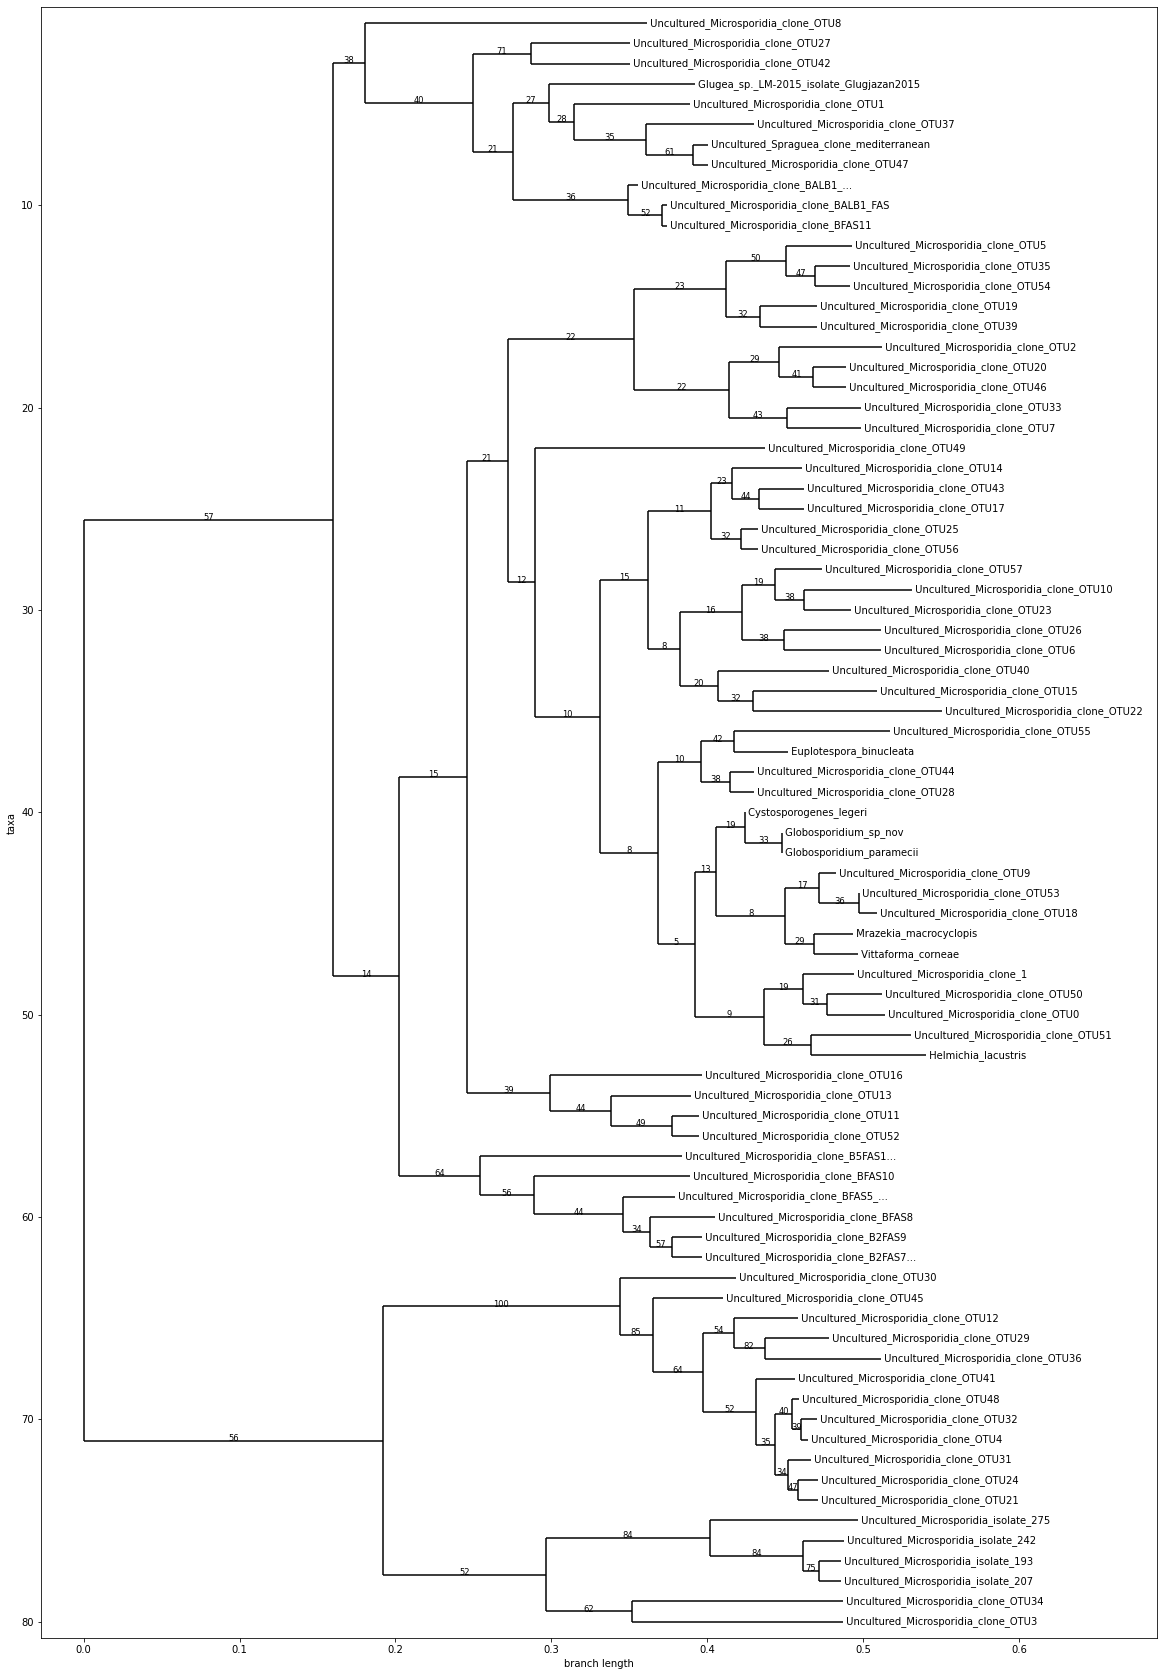

In [164]:
tree = Phylo.read('upgma_consensus_tree_NAMES.newick', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=False)
plt.savefig("upgma_consensus_tree.pdf", format='pdf')

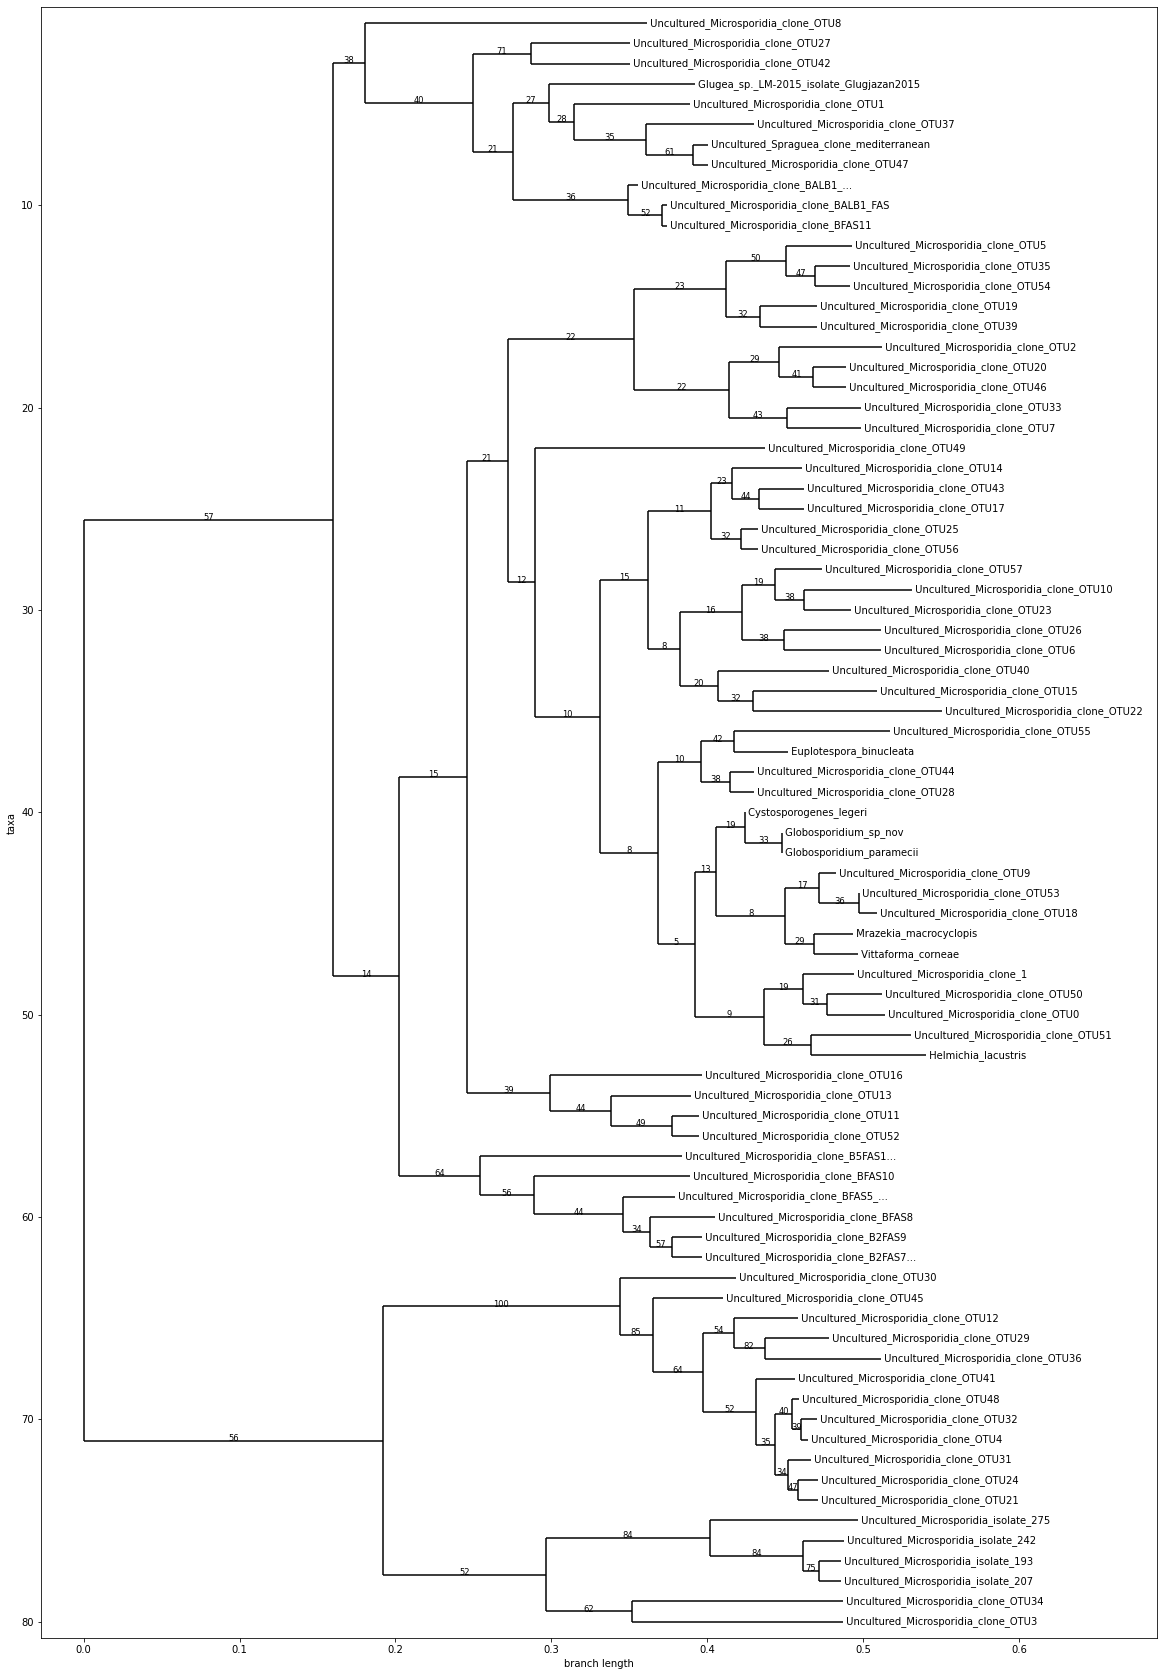

In [174]:
tree = Phylo.read('upgma_consensus_tree_NAMES.newick', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=False)
plt.savefig("upgma_consensus_tree.png", format='png')

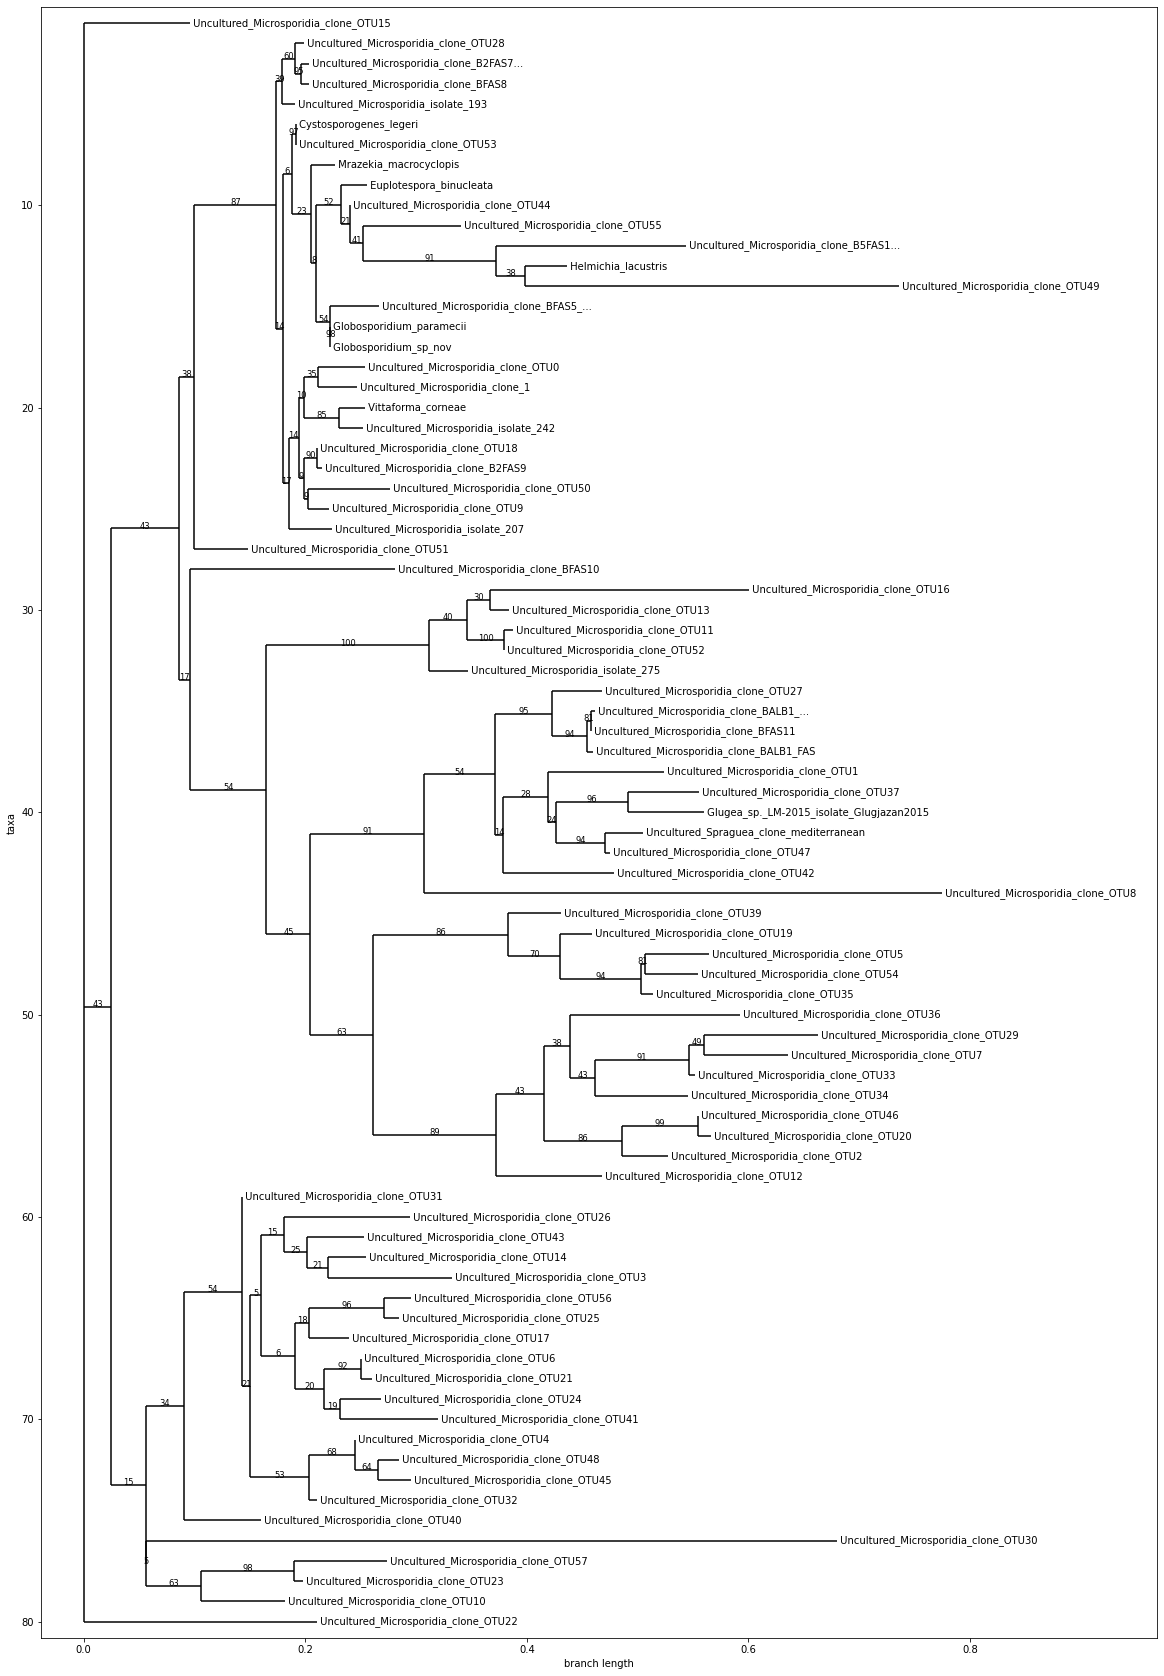

In [165]:
with open('./trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_muscle_GTRGAMMA', 'r') as in_f:
    with open('./trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_muscle_GTRGAMMA_NAMES', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))
        
tree = Phylo.read('trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_muscle_GTRGAMMA_NAMES', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=True)
# plt.savefig("upgma_consensus_tree.pdf", format='pdf')

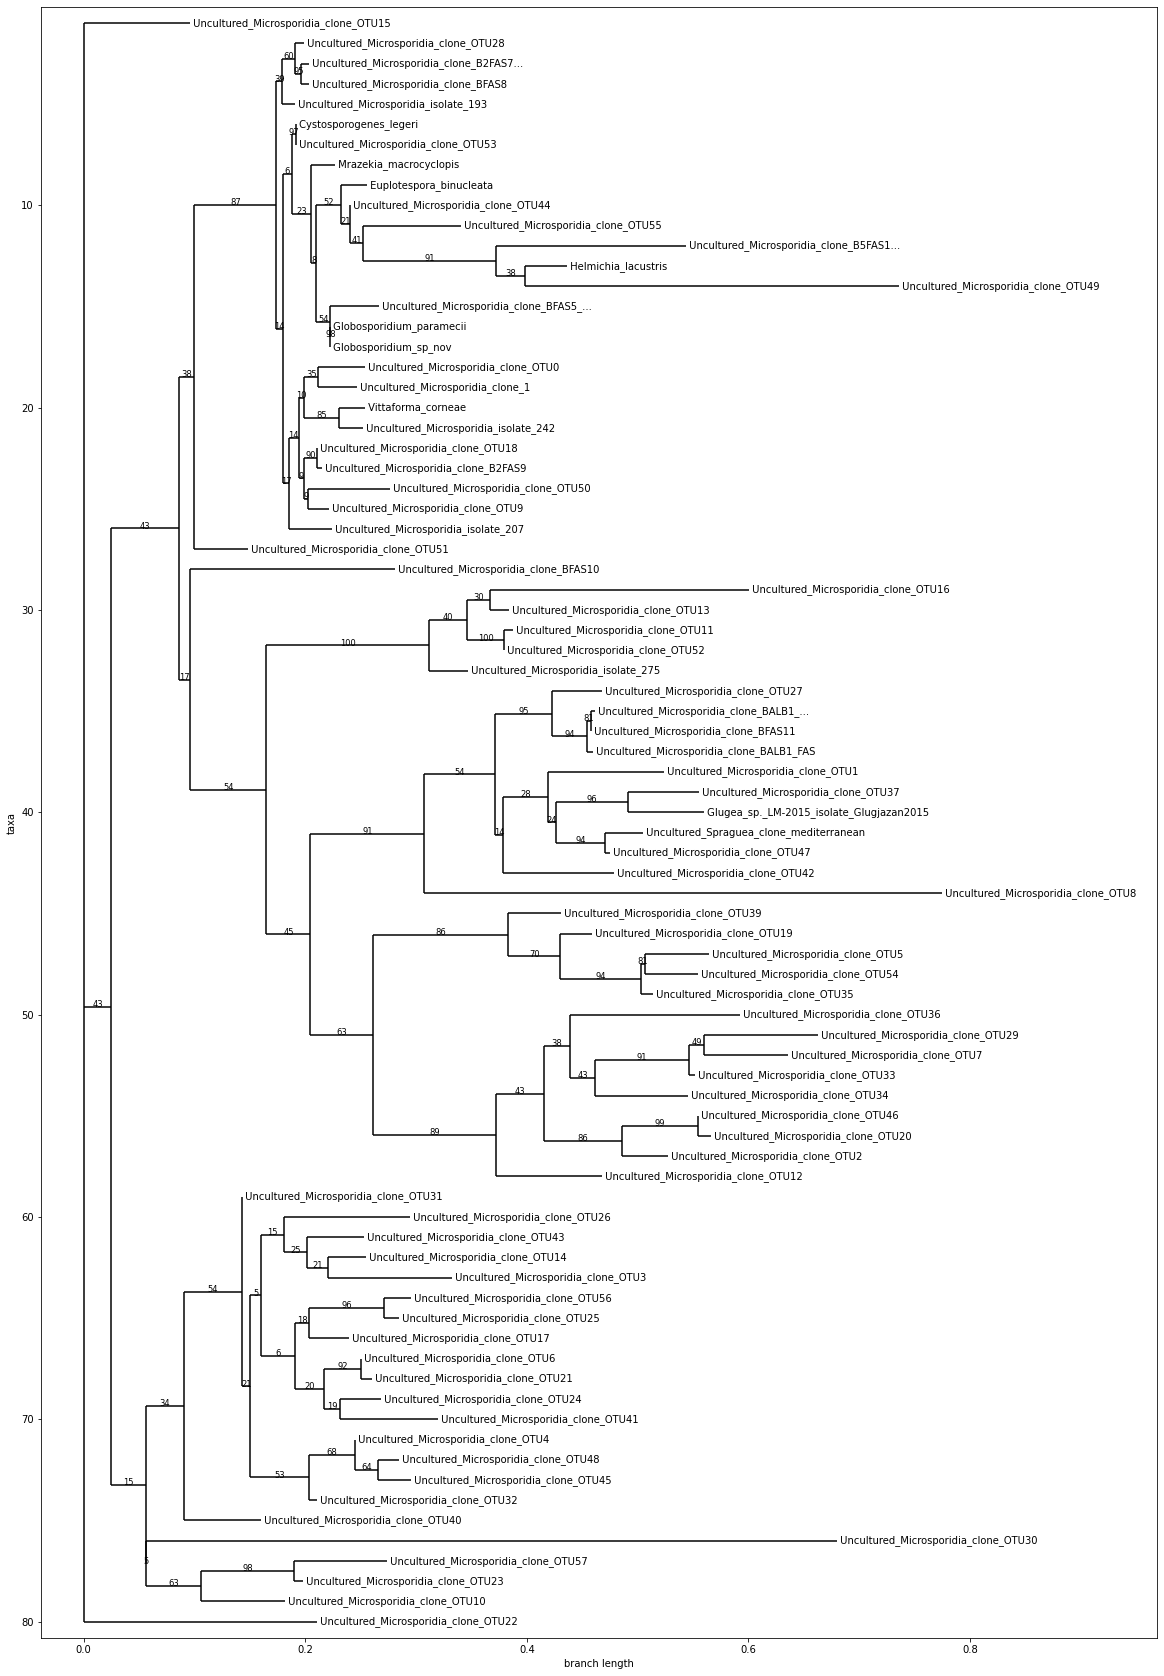

In [176]:
tree = Phylo.read('trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_muscle_GTRGAMMA_NAMES', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=False)
plt.savefig("regions_muscle_RAxML_GTRGAMMA.png", format='png')

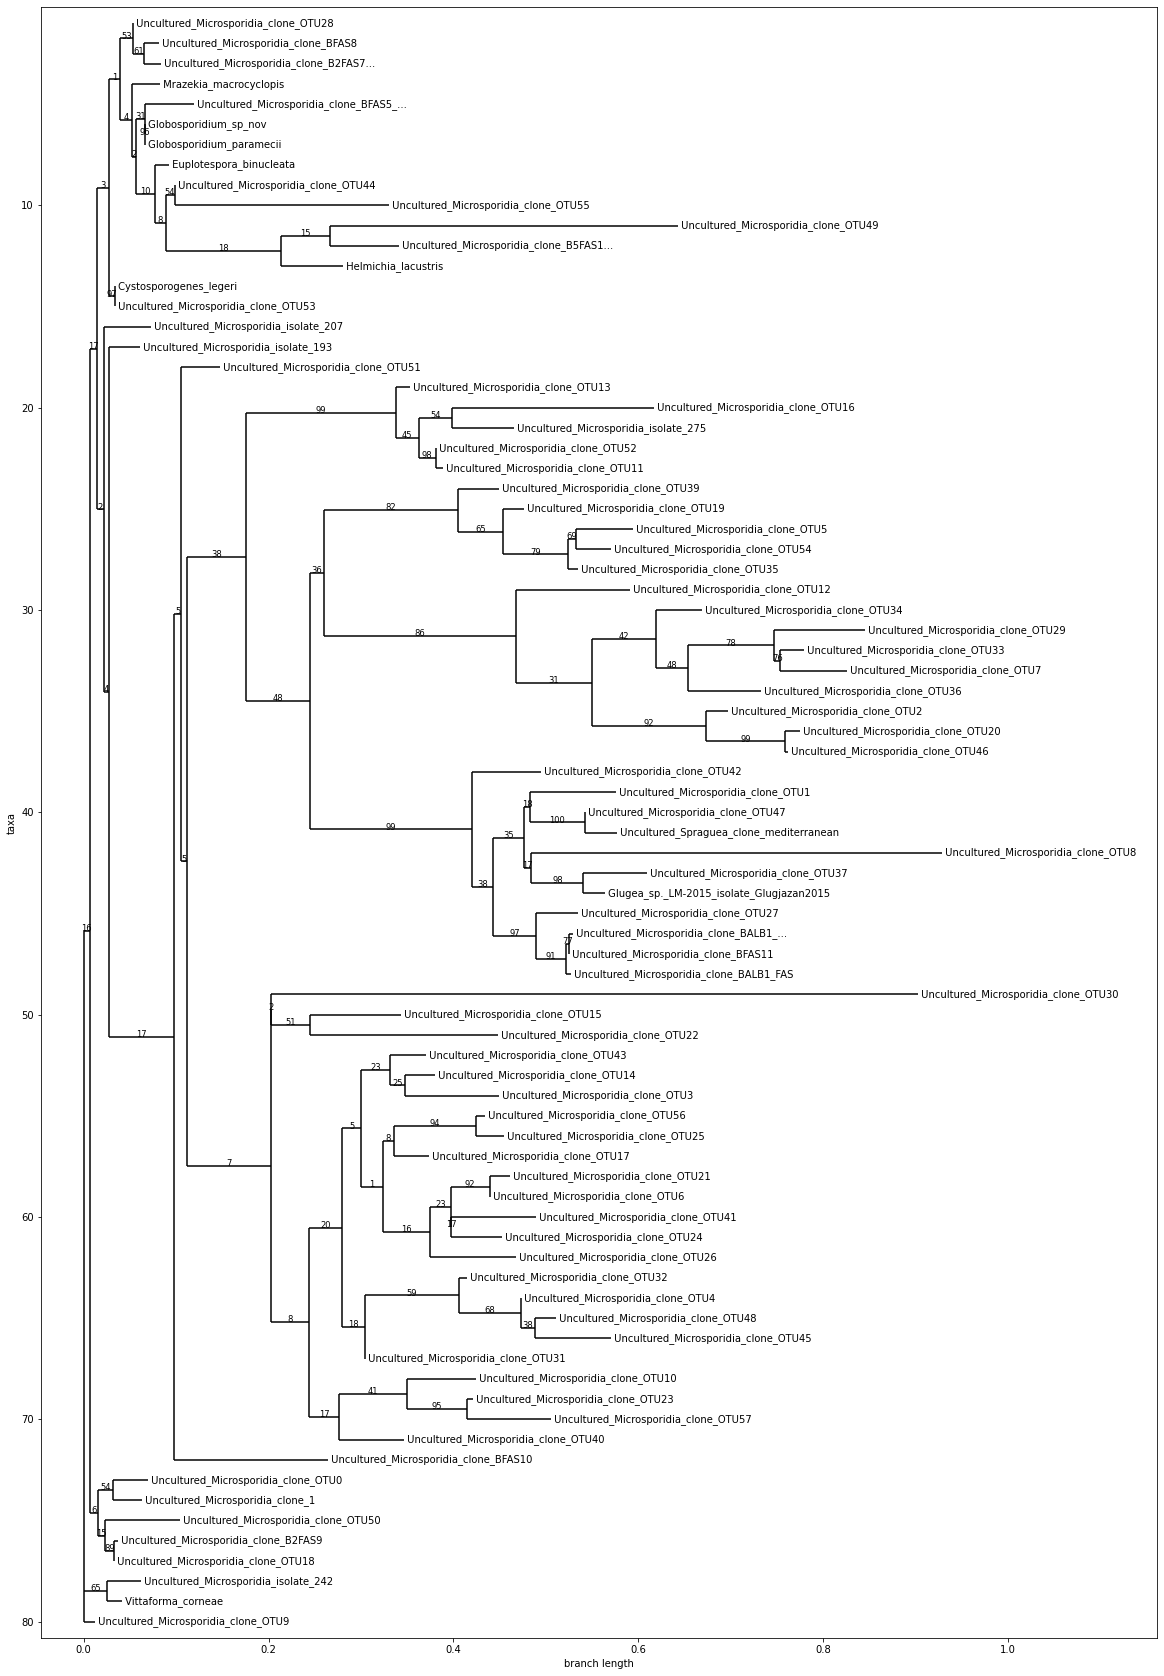

In [166]:
with open('./trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_clustalw_GTRGAMMA', 'r') as in_f:
    with open('./trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_clustalw_GTRGAMMA_NAMES', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))
        
tree = Phylo.read('trees/RAxML_analysis/bipartitions/regions/RAxML_bipartitions.regions_clustalw_GTRGAMMA_NAMES', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=True)
# plt.savefig("upgma_consensus_tree.pdf", format='pdf')

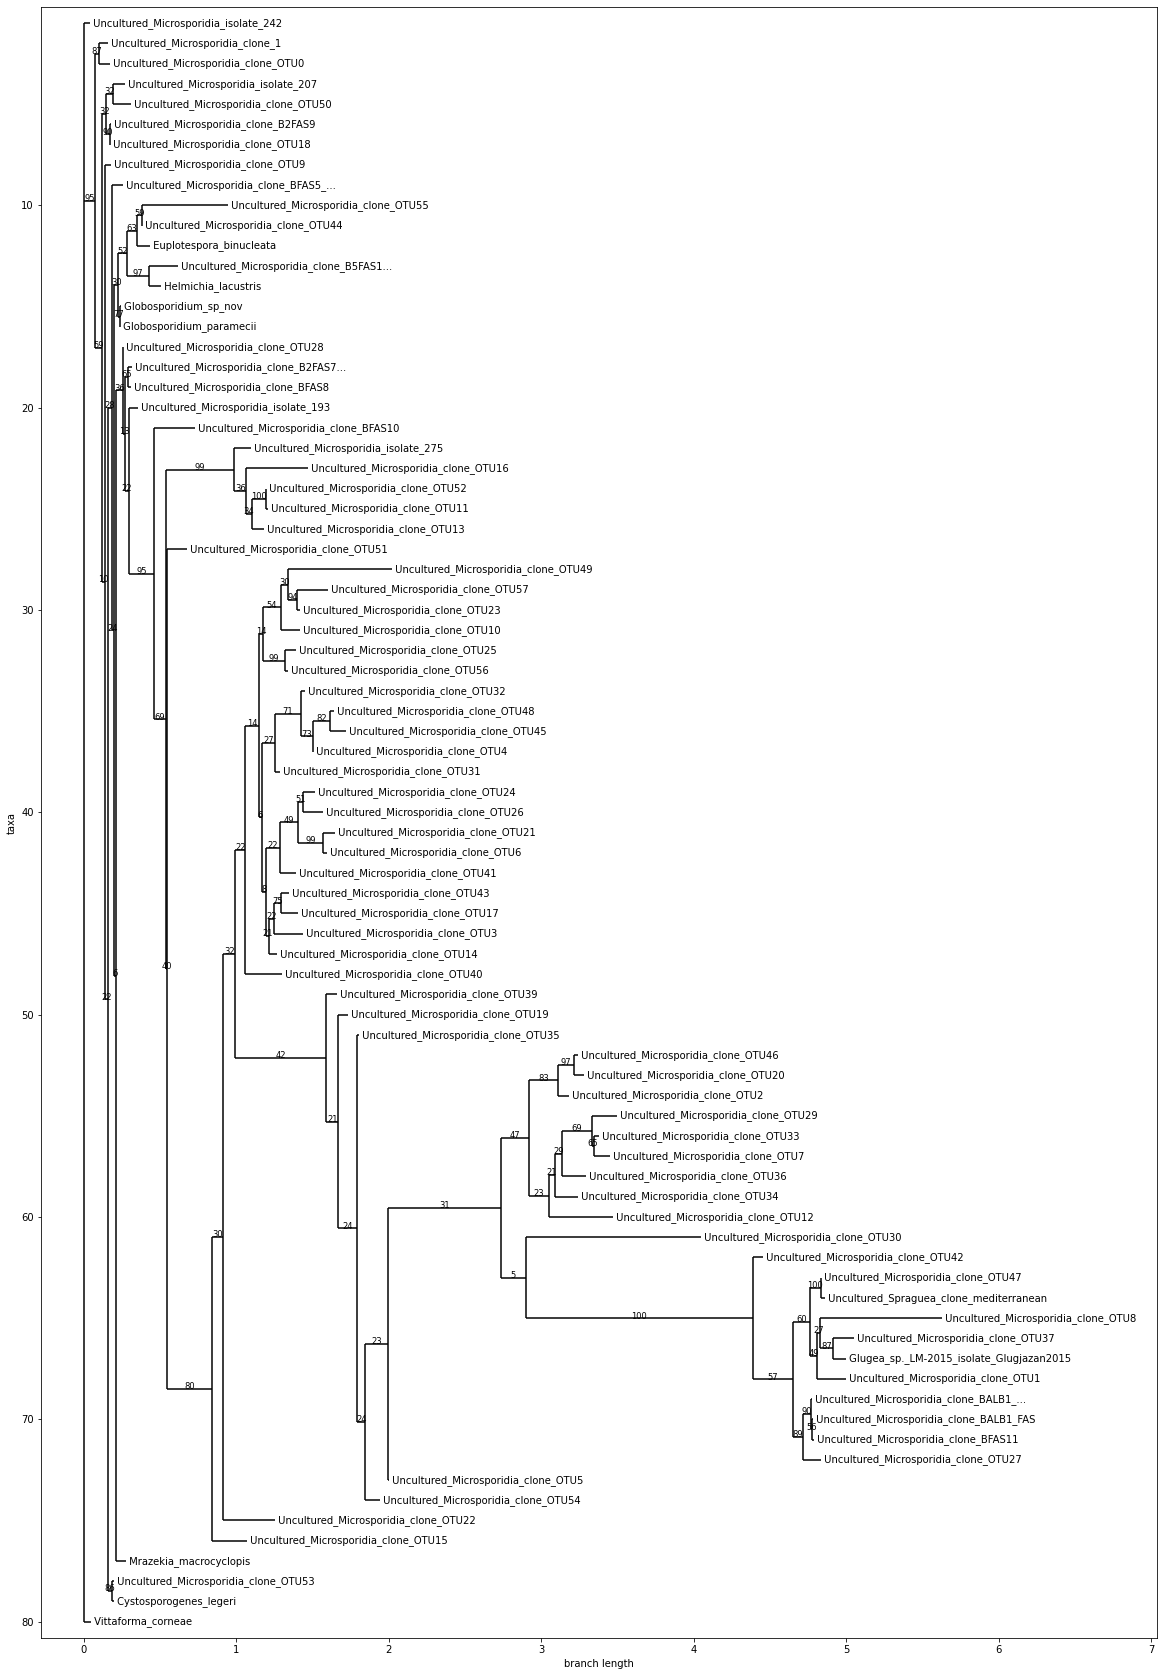

In [167]:
with open('./trees/RAxML_analysis/bipartitions/full/RAxML_bipartitions.clustalw_GTRGAMMA', 'r') as in_f:
    with open('./trees/RAxML_analysis/bipartitions/full/RAxML_bipartitions.clustalw_GTRGAMMA_NAMES', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))
        
tree = Phylo.read('trees/RAxML_analysis/bipartitions/full/RAxML_bipartitions.clustalw_GTRGAMMA_NAMES', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=True)
# plt.savefig("upgma_consensus_tree.pdf", format='pdf')

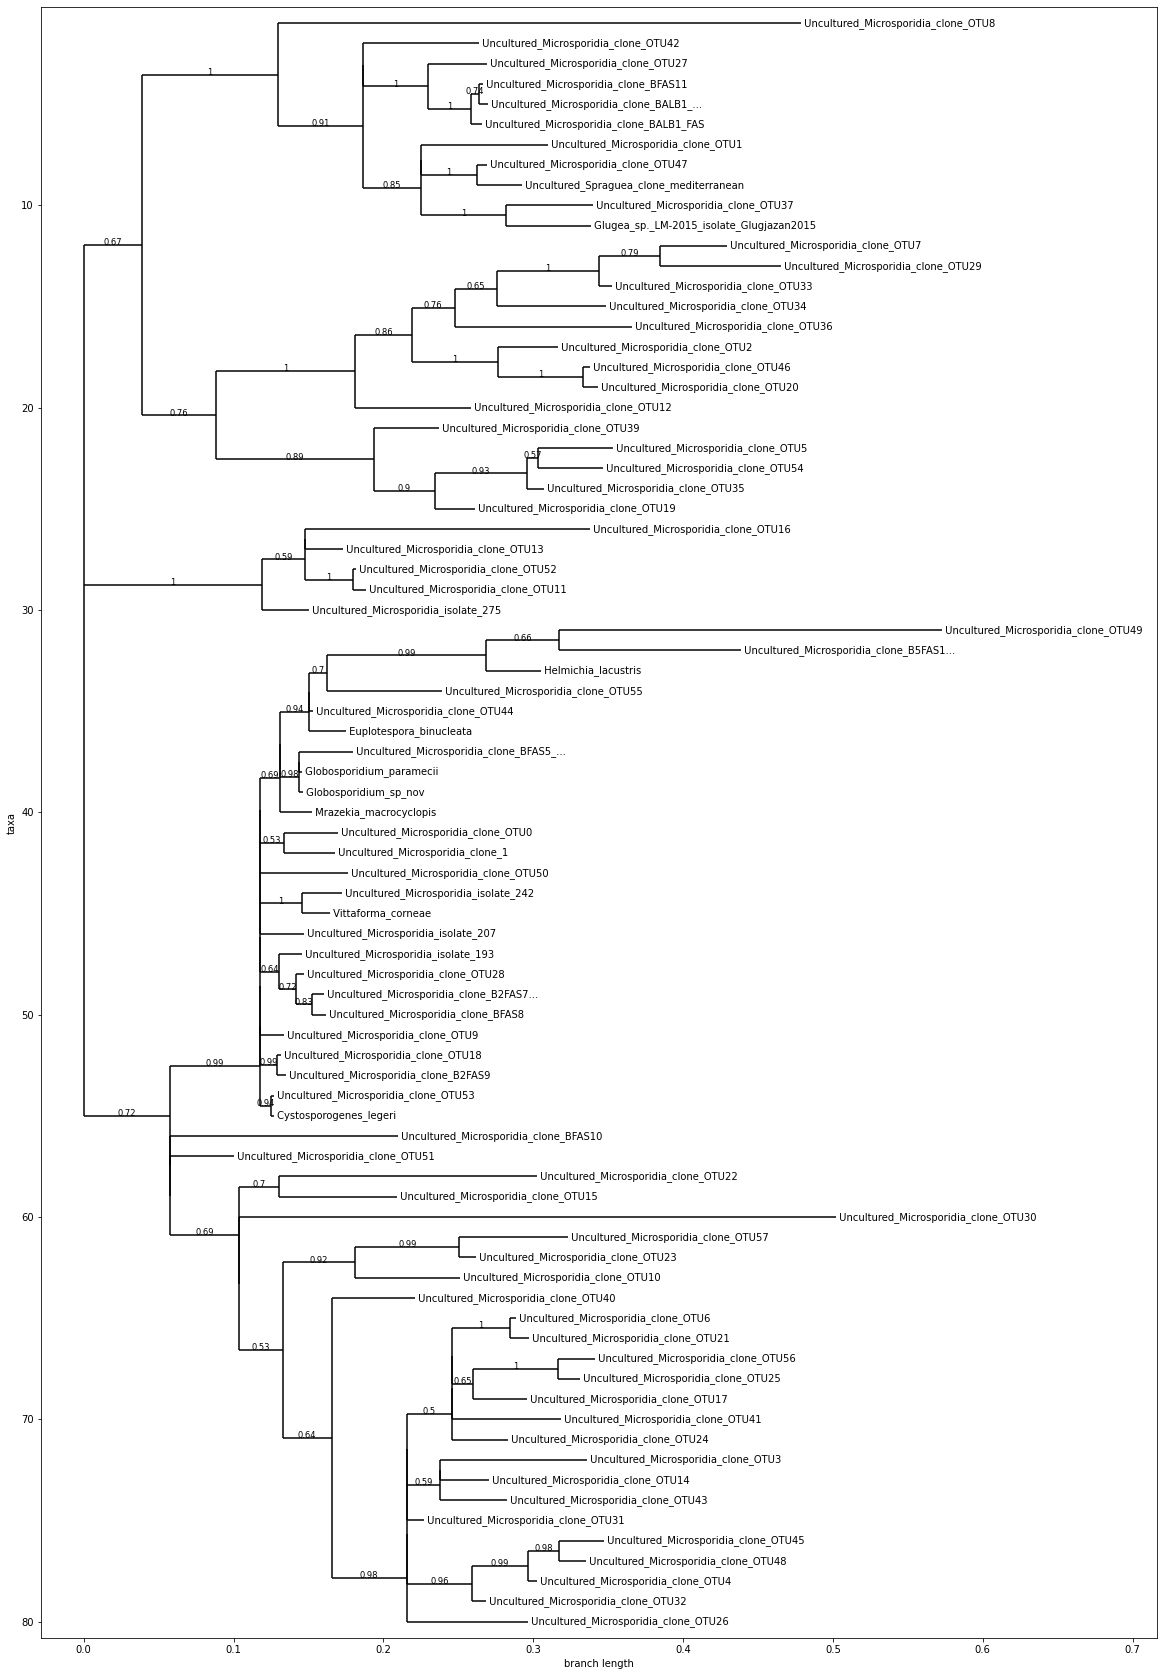

In [202]:
with open('./con_50_majrule', 'r') as in_f:
    with open('./con_50_majrule_NAMES', 'w') as out_f:
        out_f.write(multipleReplace(in_f.read(), taxon_dict))
        
tree = Phylo.read('con_50_majrule_NAMES', 'newick')
plt.rcParams['figure.figsize'] = [20, 30]
Phylo.draw(tree, do_show=False)
plt.savefig("mrbayes_consensus_tree.png", format='png')